In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Ouverture via colab
#from google.colab import drive
#drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#df=pd.read_csv('/content/gdrive/My Drive/Val_projet/airbnb.csv',";")

# **Ouverture du csv, un peu long car volumineux**

In [ ]:
#Ouverture local
df=pd.read_csv('airbnb.csv',";")

Le dataframe est immense et nous n'allons pas tout utiliser, nous supprimons toutes les colonnes qui ne sont pas utiles à notre recherche. Nous pourrons toujours venir les rechercher si nous en avons le besoin


In [ ]:
#Premiere supression de variables pas utiles à notre analyse
df=df.drop(['Listing Url','Scrape ID','Last Scraped','Host Acceptance Rate','Scrape ID','Last Scraped',
            'Thumbnail Url','Medium Url','Picture Url','XL Picture Url','Host URL','Host Acceptance Rate',
           'Host Thumbnail Url','Host Picture Url','Host Verifications','Neighbourhood','Neighbourhood Group Cleansed',
           'Geolocation','Has Availability','Calendar last Scraped','License','Jurisdiction Names'], axis=1)

In [ ]:
#deuxieme supression de variables pas utiles à notre analyse
df=df.drop(['Summary','Space','Experiences Offered','Notes','Access','State','Zipcode','Host Name','Host Location','Host Neighbourhood', 'Host ID',
           'Host Listings Count','Smart Location','Country Code','Square Feet','Security Deposit','Calendar Updated',
            'Guests Included','Extra People','Street','Country','Cancellation Policy','Calculated host listings count','Features','Market'], axis=1)

In [ ]:
#On rename les colonnes qui ont des espaces
df.rename(columns={'ID':"id",'Name': 'name', 'Description': 'description', 'Host About': 'host_about', 'Host Response Time': 'host_response_time', 'Host Response Rate': 'host_response_rate', 'Host Total Listings Count': 'host_total_listing_count', 'Neighbourhood Cleansed': 'neighbourhood_cleansed' , 'City': 'city', 'Property Type': 'property_type', 'Room Type': 'room_type', 'Accommodates': 'accommodates'
, 'Bathrooms': 'bathrooms', 'Bedrooms': 'bedrooms', 'Beds': 'beds', 'Bed Type': 'bed_type', 'Amenities': 'amenities', 'Price': 'price', 'Weekly Price': 'weekly_price', 'Monthly Price': 'monthly_price', 'Cleaning Fee': 'cleaning_fee', 'Minimum Nights': 'minimum_nights', 'Maximum Nights': 'maximum_nights', 'Availability 30': 'availability_30', 'Availability 60': 'availability_60', 'Availability 90': 'availability_90', 'Availability 365': 'availability_365', 'Number of Reviews': 'number_of_reviews', 'First Review': 'first_review'
, 'Last Review': 'last_review', 'Review Scores Rating': 'review_scores_rating', 'Review Scores Accuracy': 'review_scores_accuracy', 'Review Scores Cleanliness': 'review_scores_cleanliness', 'Review Scores Checkin': 'review_scores_checkin', 'Review Scores Communication': 'review_scores_communication', 'Review Scores Location': 'review_scores_location', 'Review Scores Value': 'review_scores_value', 'Reviews per Month': 'reviews_per_month', 'Longitude': 'longitude','Latitude': 'latitude',"Neighborhood Overview":"neighborhood_overview","Transit":"transit","Interaction":"interaction","House Rules":"house_rules","Host Since":"host_since"}, inplace=True)

In [ ]:
# on met la colonne id en index

df=df.set_index("id")

In [ ]:
#Nous allons nous concentrer sur les villes de Paris et Londres, avant de commencer le nettoyage nous allons garder uniquement toutes les données concernant ces deux villes

#on divise le df par villes puis on les regroupe dans df
df_paris=df[df.city=='Paris']
df_london=df[df.city=='London']
df = df_paris.append(df_london)

In [ ]:
#On verifie qu'il reste bien uniquement Paris et Londres
print(df['city'].unique())

['Paris' 'London']


# **Analyse du dataframe**

In [ ]:
#informations
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101936 entries, 7735531 to 14561490
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   name                         101932 non-null  object 
 1   description                  101922 non-null  object 
 2   neighborhood_overview        60460 non-null   object 
 3   transit                      64012 non-null   object 
 4   interaction                  52028 non-null   object 
 5   house_rules                  58563 non-null   object 
 6   host_since                   101917 non-null  object 
 7   host_about                   58891 non-null   object 
 8   host_response_time           72188 non-null   object 
 9   host_response_rate           72188 non-null   float64
 10  host_total_listing_count     101917 non-null  float64
 11  neighbourhood_cleansed       101936 non-null  object 
 12  city                         101936 non-null  object 
 

In [ ]:
#Somme des Nans par colonne
df.isna().sum()

name                               4
description                       14
neighborhood_overview          41476
transit                        37924
interaction                    49908
house_rules                    43373
host_since                        19
host_about                     43045
host_response_time             29748
host_response_rate             29748
host_total_listing_count          19
neighbourhood_cleansed             0
city                               0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                        371
bedrooms                         220
beds                             207
bed_type                           0
amenities                        944
price                            107
weekly_price                   77187
monthly_price                  82500
cleaning_fee                   37986
m

In [ ]:
#Somme des Nans par colonne
print('\n Données manquantes par colonne :\n')
print(df.isna().sum())


 Données manquantes par colonne :

name                               4
description                       14
neighborhood_overview          41476
transit                        37924
interaction                    49908
house_rules                    43373
host_since                        19
host_about                     43045
host_response_time             29748
host_response_rate             29748
host_total_listing_count          19
neighbourhood_cleansed             0
city                               0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                        371
bedrooms                         220
beds                             207
bed_type                           0
amenities                        944
price                            107
weekly_price                   77187
monthly_price                  82500
cl

In [ ]:
#Verification des doublons
df.duplicated().sum()

0

In [ ]:
#Nombre de valeur unique par colonne
df.nunique()

name                            98320
description                    100242
neighborhood_overview           55331
transit                         59619
interaction                     44384
house_rules                     49835
host_since                       2680
host_about                      41051
host_response_time                  4
host_response_rate                 89
host_total_listing_count           93
neighbourhood_cleansed             53
city                                2
latitude                       101936
longitude                      101936
property_type                      30
room_type                           3
accommodates                       16
bathrooms                          17
bedrooms                           11
beds                               17
bed_type                            5
amenities                       76604
price                             626
weekly_price                      743
monthly_price                    1771
cleaning_fee

In [ ]:
#description
df.describe()

host_response_rate  ...  reviews_per_month
count        72188.000000  ...       74087.000000
mean            92.151189  ...           1.239842
std             19.620885  ...           1.424954
min              0.000000  ...           0.010000
25%             96.000000  ...           0.280000
50%            100.000000  ...           0.710000
75%            100.000000  ...           1.670000
max            100.000000  ...          18.000000

[8 rows x 27 columns]

# **Démarrons maintenant le nettoyage**

In [ ]:
#On supprime les lignes dont les reviews ne sont pas renseignés étant donnée que c'est un point important de notre analyse
df=df.dropna(axis=0,subset=["first_review","last_review","review_scores_rating","review_scores_accuracy","review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value","reviews_per_month"])

In [ ]:
#Maintenant que toutes les données ont une note attribuée, nous allons affiner en retirant les lignes qui ont des nans et qui peuvent fausser notre analyse.
df=df.dropna(axis=0,subset=["description","name","host_since","host_total_listing_count","price"]) 

In [ ]:
#On supprime ces deux variables qui présentent trop de données manquantes pour être exploitées et qui sont difficiles à remplacer sans impacter les résultats de l'analyse
df=df.drop(['host_response_time','host_response_rate'], axis=1)

In [ ]:
# on remplace les nans des colonnes non renseigné volontairement par "nr", et "0" pour les colonnes numériques 'weekly_price','montly_price' et 'cleaning_fee'
# De plus, on remplace par 0 les Nans de 'bathrooms','bedrooms' et 'bed' que l'on conciderera par non renseigné par la suite

# afin de tout de même prendre en compte cette donnée et de ne pas fausser les analyses futures
# En effet, il y a énormément d'annonces dont ces colonnes ne sont pas remplies donc on ne peut pas simplement les supprimer

#je souhaitais garder les variables numerique et objet comme elles etaient, d'où le 'nr pour objet et 0 pour numerique (je n'ai pas trouvé par quoi d'autre que 0 totu en gardant la variable en numerique)

df["neighborhood_overview"]=df["neighborhood_overview"].fillna("nr")
df["transit"]=df["transit"].fillna("nr")
df["interaction"]=df["interaction"].fillna("nr")
df["house_rules"]=df["house_rules"].fillna("nr")
df["host_about"]=df["host_about"].fillna("nr")
df["amenities"]=df["amenities"].fillna("nr")
df["bathrooms"]=df["bathrooms"].fillna(0)
df["bedrooms"]=df["bedrooms"].fillna(0)
df["beds"]=df["beds"].fillna(0)
df["weekly_price"]=df["weekly_price"].fillna(0)
df["monthly_price"]=df["monthly_price"].fillna(0)
df["cleaning_fee"]=df["cleaning_fee"].fillna(0)

# Et nous remplaçons les Nan de 'host_response_rate' par la moyenne, car 0 aurait un trop grand impact et 'nr' transformera la variable en 'objet'
df["host_response_rate"]=df["host_response_rate"].fillna(df["host_response_rate"].mean())
df["host_response_time"]=df["host_response_time"].fillna("nr")

In [ ]:
#On vérifie si il reste des Nans.
print('\n Données manquantes par colonne :\n')
print(df.isna().sum())

#Non tout est bon, on peut passer à la suite


 Données manquantes par colonne :

name                           0
description                    0
neighborhood_overview          0
transit                        0
interaction                    0
house_rules                    0
host_since                     0
host_about                     0
host_total_listing_count       0
neighbourhood_cleansed         0
city                           0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
bed_type                       0
amenities                      0
price                          0
weekly_price                   0
monthly_price                  0
cleaning_fee                   0
minimum_nights                 0
maximum_nights                 0
availability_30                0
availability_60                0
availab

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72103 entries, 7735531 to 9973188
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         72103 non-null  object 
 1   description                  72103 non-null  object 
 2   neighborhood_overview        72103 non-null  object 
 3   transit                      72103 non-null  object 
 4   interaction                  72103 non-null  object 
 5   house_rules                  72103 non-null  object 
 6   host_since                   72103 non-null  object 
 7   host_about                   72103 non-null  object 
 8   host_total_listing_count     72103 non-null  float64
 9   neighbourhood_cleansed       72103 non-null  object 
 10  city                         72103 non-null  object 
 11  latitude                     72103 non-null  float64
 12  longitude                    72103 non-null  float64
 13  property_type

# **Analyse des variables numériques**

In [ ]:

#On stock les variables numérique dans num_df
num_df=df.select_dtypes(include="float64")

In [ ]:
#On affiche la moyenne de chaque variable numerique dans un df appelé stats
stats = pd.DataFrame(num_df.mean(), columns = ['moyenne'])
stats.round(2)

#On remarque un soucis dans la variable 'maximum_nights'
#Et potentiellement des erreurs dans le 'minimum_nights' qui devrait etre proche de 1

moyenne
host_total_listing_count          7.04
latitude                         50.04
longitude                         1.25
accommodates                      3.09
bathrooms                         1.16
bedrooms                          1.17
beds                              1.70
price                            93.22
weekly_price                    137.39
monthly_price                   478.21
cleaning_fee                     24.16
minimum_nights                    3.56
maximum_nights               257065.05
availability_30                   9.23
availability_60                  20.66
availability_90                  33.81
availability_365                156.56
number_of_reviews                19.55
review_scores_rating             91.79
review_scores_accuracy            9.46
review_scores_cleanliness         9.18
review_scores_checkin             9.63
review_scores_communication       9.67
review_scores_location            9.44
review_scores_value               9.23
reviews_per_month                 1.27



 Il semble y avoir des valeurs abérrantes dans maximum_nights pour avoir des valeurs si élevées

 Nous allons donc regarder cette variable ainsi que minimum_nights

In [ ]:
#On recherche le bien avec la valeur la plus élevé pour maximum_nights
num_df['maximum_nights'].idxmax(axis = 0)

642950

In [ ]:
#On affiche le logement qui a la valeur la plus élevée pour maximum_nights
print(df.loc[642950])
#Nous constatons une valeur abérrante

name                                         Studio + Garden + BBQ in Montmartre
description                    Cosy Studio in the heart of the 18th down the ...
neighborhood_overview          I will give you a list of cafés, bars and rest...
transit                                                                       nr
interaction                    I Will be In touch through text message, tel o...
house_rules                                                                   nr
host_since                                                            2012-08-09
host_about                     I lived in San Francisco for 6 years. Back in ...
host_total_listing_count                                                       3
neighbourhood_cleansed                                         Buttes-Montmartre
city                                                                       Paris
latitude                                                                 48.8942
longitude                   

In [ ]:
#On affiche un autre bien qui contient des valeur abérrantes
print(df.loc[9112784])   #valeur aberrante minimum night 3888 et maximum night 9999

name                                    APARTMENT FOR 4 PEOPLE IN CENTRAL LONDON
description                    The apartment is situated in a very central lo...
neighborhood_overview          You are in the middle of it all with all the f...
transit                        Barbican Tube Station - 8 minutes walk Farring...
interaction                    I am available via e-mail and (SENSITIVE CONTE...
house_rules                    No smoking, no drugs, and no pets allowed. It ...
host_since                                                            2013-07-22
host_about                     Am a globetrotter - lived and worked all aroun...
host_total_listing_count                                                       1
neighbourhood_cleansed                                                 Islington
city                                                                      London
latitude                                                                 51.5252
longitude                   

In [ ]:
#print(df.loc[10192308 ])

In [ ]:
#print(df.sort_values(by = 'maximum_nights').tail(40))

In [ ]:
#print(df.sort_values(by = 'minimum_nights').tail(40))

A peu près 30 annonces ont une valeur abérrante pour la variable 'minimum_nights'

A peu près 80 annonces ont une valeur abérrante pour la variable 'maximum_nights'

In [ ]:
#On change les valeur aberrante (qui depasse 365jours) de maximum_nights en valeur de la variable 'availability_365', qui semble plus logique
num_df['maximum_nights'] = np.where(num_df['maximum_nights'] > 365, num_df['availability_365'], num_df['maximum_nights'])


In [ ]:
#On verifie quel est le logement avec le plus grand nombre de maximum_nights
num_df['maximum_nights'].idxmax(axis = 0)

1372747

In [ ]:
#On utilise cet index pour repérer le logement
print(df.loc[1372747])
#On constate qu'il a 365 donc plus de valeur aberrante dans cette variable

name                                                      Charming Studio Marais
description                    APARTMENT INFORMATION This charming and comfor...
neighborhood_overview                                                         nr
transit                                                                       nr
interaction                                                                   nr
house_rules                                              Minimum stays of 1 week
host_since                                                            2013-07-12
host_about                                                                    nr
host_total_listing_count                                                       8
neighbourhood_cleansed                                            Hôtel-de-Ville
city                                                                       Paris
latitude                                                                  48.856
longitude                   

In [ ]:
#On modifie les valeurs abérrantes de minimum_nights en remplaçant toutes les valeurs au dessus de 31 jours par 1
num_df.minimum_nights[num_df.minimum_nights > 31] = 1


In [ ]:
#On verifie quel est le plus grand nombre de minimum_nights
num_df['maximum_nights'].idxmax(axis = 0)

1372747

In [ ]:
#On affiche le logement avec l'index qui le plus grand nombre de minimum_night
print(df.loc[1372747])

#on ne remarque plus de valeur aberrante mais on remarque que ce logement a ausi le nombre de maximum_night maximum
#cet utilisateur loue donc pour des longues durées
# il a par ailleurs fait une erreur soit dans house_rules soit dans minimum_night car le nombre de nuitées minimum entrées ne correspond pas aux house_rules

name                                                      Charming Studio Marais
description                    APARTMENT INFORMATION This charming and comfor...
neighborhood_overview                                                         nr
transit                                                                       nr
interaction                                                                   nr
house_rules                                              Minimum stays of 1 week
host_since                                                            2013-07-12
host_about                                                                    nr
host_total_listing_count                                                       8
neighbourhood_cleansed                                            Hôtel-de-Ville
city                                                                       Paris
latitude                                                                  48.856
longitude                   

In [ ]:
#On refait la moyenne de chaque variable numerique dans un df appelé stats
stats2 = pd.DataFrame(num_df.mean(), columns = ['moyenne'])
stats2.round(2)

moyenne
host_total_listing_count        7.04
latitude                       50.04
longitude                       1.25
accommodates                    3.09
bathrooms                       1.16
bedrooms                        1.17
beds                            1.70
price                          93.22
weekly_price                  137.39
monthly_price                 478.21
cleaning_fee                   24.16
minimum_nights                  2.70
maximum_nights                125.25
availability_30                 9.23
availability_60                20.66
availability_90                33.81
availability_365              156.56
number_of_reviews              19.55
review_scores_rating           91.79
review_scores_accuracy          9.46
review_scores_cleanliness       9.18
review_scores_checkin           9.63
review_scores_communication     9.67
review_scores_location          9.44
review_scores_value             9.23
reviews_per_month               1.27

In [ ]:
#On fait la mediane
stats2['median'] = num_df.median()
stats2

moyenne      median
host_total_listing_count       7.042647    1.000000
latitude                      50.042177   48.887775
longitude                      1.247832    2.296717
accommodates                   3.091078    2.000000
bathrooms                      1.157691    1.000000
bedrooms                       1.173904    1.000000
beds                           1.703452    1.000000
price                         93.215664   75.000000
weekly_price                 137.394034    0.000000
monthly_price                478.213445    0.000000
cleaning_fee                  24.160396   20.000000
minimum_nights                 2.696282    2.000000
maximum_nights               125.248436   60.000000
availability_30                9.230559    4.000000
availability_60               20.663634   13.000000
availability_90               33.812088   24.000000
availability_365             156.557258  119.000000
number_of_reviews             19.546191    8.000000
review_scores_rating          91.788358   94.000000
review_scores_accuracy         9.456084   10.000000
review_scores_cleanliness      9.184639   10.000000
review_scores_checkin          9.631180   10.000000
review_scores_communication    9.669917   10.000000
review_scores_location         9.444905   10.000000
review_scores_value            9.232639    9.000000
reviews_per_month              1.267562    0.740000

In [ ]:
#On crée une variable mean_med_diff correspondant à la valeur absolue de la différence entre moyenne et médiane.
stats2['mean_med_diff'] = abs(stats2['moyenne'] - stats2['median'])
stats2.round(2)

moyenne  median  mean_med_diff
host_total_listing_count        7.04    1.00           6.04
latitude                       50.04   48.89           1.15
longitude                       1.25    2.30           1.05
accommodates                    3.09    2.00           1.09
bathrooms                       1.16    1.00           0.16
bedrooms                        1.17    1.00           0.17
beds                            1.70    1.00           0.70
price                          93.22   75.00          18.22
weekly_price                  137.39    0.00         137.39
monthly_price                 478.21    0.00         478.21
cleaning_fee                   24.16   20.00           4.16
minimum_nights                  2.70    2.00           0.70
maximum_nights                125.25   60.00          65.25
availability_30                 9.23    4.00           5.23
availability_60                20.66   13.00           7.66
availability_90                33.81   24.00           9.81
availability_365              156.56  119.00          37.56
number_of_reviews              19.55    8.00          11.55
review_scores_rating           91.79   94.00           2.21
review_scores_accuracy          9.46   10.00           0.54
review_scores_cleanliness       9.18   10.00           0.82
review_scores_checkin           9.63   10.00           0.37
review_scores_communication     9.67   10.00           0.33
review_scores_location          9.44   10.00           0.56
review_scores_value             9.23    9.00           0.23
reviews_per_month               1.27    0.74           0.53

In [ ]:
#On ajoute les 3 colonnes qui correponde aux 3 quantiles de chaques variables numérique
stats2[['q1', 'q2', 'q3']] = num_df.quantile(q = [0.25,0.5,0.75]).transpose()

In [ ]:
#On peut compléter notre analyse en s'intéressant au min, max de chaque variable. 
#La différence des deux nous donnera une idée de l'étendue sur laquelle se répartissent les valeurs.
stats2['min'] = num_df.min()
stats2['max'] = num_df.max()
stats2['min_max_diff'] = stats2['max'] - stats2['min']
stats2

moyenne      median  ...           max  min_max_diff
host_total_listing_count       7.042647    1.000000  ...    735.000000    735.000000
latitude                      50.042177   48.887775  ...     51.653192      2.836602
longitude                      1.247832    2.296717  ...      2.421537      2.900755
accommodates                   3.091078    2.000000  ...     16.000000     15.000000
bathrooms                      1.157691    1.000000  ...      8.000000      8.000000
bedrooms                       1.173904    1.000000  ...     10.000000     10.000000
beds                           1.703452    1.000000  ...     16.000000     16.000000
price                         93.215664   75.000000  ...    999.000000    991.000000
weekly_price                 137.394034    0.000000  ...    999.000000    999.000000
monthly_price                478.213445    0.000000  ...  25000.000000  25000.000000
cleaning_fee                  24.160396   20.000000  ...    750.000000    750.000000
minimum_nights                 2.696282    2.000000  ...     31.000000     30.000000
maximum_nights               125.248436   60.000000  ...    365.000000    365.000000
availability_30                9.230559    4.000000  ...     30.000000     30.000000
availability_60               20.663634   13.000000  ...     60.000000     60.000000
availability_90               33.812088   24.000000  ...     90.000000     90.000000
availability_365             156.557258  119.000000  ...    365.000000    365.000000
number_of_reviews             19.546191    8.000000  ...    488.000000    487.000000
review_scores_rating          91.788358   94.000000  ...    100.000000     80.000000
review_scores_accuracy         9.456084   10.000000  ...     10.000000      8.000000
review_scores_cleanliness      9.184639   10.000000  ...     10.000000      8.000000
review_scores_checkin          9.631180   10.000000  ...     10.000000      8.000000
review_scores_communication    9.669917   10.000000  ...     10.000000      8.000000
review_scores_location         9.444905   10.000000  ...     10.000000      8.000000
review_scores_value            9.232639    9.000000  ...     10.000000      8.000000
reviews_per_month              1.267562    0.740000  ...     18.000000     17.990000

[26 rows x 9 columns]

On remarque que la médiane et la moyenne de la variable cible "review_scores_rating" sont très proche.

Il en est quasiment de même pour toutes les variables scores.

Ces variables sont donc hétérogènes.

Les variables les moins hétérogènes sont beds, host_total_listing_counts, host_response_rate, price, weekly_price, monthly_price et maximum_nights.

Pour la variable beds, on peut estimer que la moyenne se rapproche de 2 lits car il nous faut seulement des nombres entiers (un lit ne se divise pas).

Les résultats nous montrent que la moyenne est influencée par les valeurs extrêmes. Bien que la moyenne du nombre de lits par logement est de 2, il y a plus de logements avec un seul lit.

La différence entre la moyenne et la médiane de host_total_listing_count est très importante.

On en déduit que la moyenne est très impactée par les valeurs extrêmes et donc les propriétaires qui ont un usage commercial de Airbnb et mettent en lignes de nombreuses annnonces.

La valeur de la médiane, 1, nous informe que la grande majorité des propriétaires ne mettent qu'un logement en location.

La différence entre la moyenne et la médiane de la variable prix est assez importante. Le prix médian est bien inférieur au prix moyen.

Les valeurs de weekly_price et monthly_price nous laisse supposer que peu de personne propose de prix à la semaine ou au mois.

In [ ]:
# tests de dépendance entre variables numériques:

#import pearsonr from scipy.stats
from scipy.stats.stats import pearsonr
#teste de correlation entre le nombre de review et la note globale d'une annonce
pd.DataFrame(pearsonr(df["number_of_reviews"],df["review_scores_rating"]),index=["pearson_coeff","p-value"],columns=["résultat_test"])
#la p-value > 5%, le coefficient proche de 0, il n'y a pas de corrélation entre les deux variables.

résultat_test
pearson_coeff       0.003492
p-value             0.348390

# **Analyse des variables catégorielles**

In [ ]:
#On determine les variables catégorielles et on les stock dans cat_df
cat_df = df.select_dtypes(include=['O'])

In [ ]:
#On affiche les variables categorielles
cat_df.head()

#host_since, first_review er last_review, n'ont rien a faire ici donc elles seront donc transformées en variables 'date time'

name  ... last_review
id                                          ...            
7735531      Petit cocon au coeur de Paris  ...  2017-04-02
3036231  Enjoy the lovely heart of Paris !  ...  2017-02-26
2183529                  Studio Saint Paul  ...  2017-02-07
515970    160 M2 Place des Vosges .Marais.  ...  2017-01-03
3144316    Heart Marais-22m2 Lovely Studio  ...  2017-03-16

[5 rows x 16 columns]

In [ ]:
#On regarde la fréquence des modalités de la variable property_type
cat_df['property_type'].value_counts(normalize = True)

Apartment             0.866746
House                 0.095960
Bed & Breakfast       0.011872
Loft                  0.008807
Townhouse             0.003786
Other                 0.003523
Condominium           0.002399
Dorm                  0.001720
Guesthouse            0.001207
Boat                  0.000929
Boutique hotel        0.000832
Serviced apartment    0.000652
Hostel                0.000499
Cabin                 0.000444
Bungalow              0.000153
Villa                 0.000139
Camper/RV             0.000083
Chalet                0.000042
Castle                0.000028
Earth House           0.000028
Yurt                  0.000028
Treehouse             0.000014
Ryokan (Japan)        0.000014
Tent                  0.000014
Hut                   0.000014
Timeshare             0.000014
Tipi                  0.000014
Igloo                 0.000014
Cave                  0.000014
Parking Space         0.000014
Name: property_type, dtype: float64

In [ ]:
#Nous allons garder uniquement les types de propriété 'Apartment' et 'House' qui représente 99,6% du dataset
cat_df['property_type']=cat_df['property_type'].loc[cat_df['property_type'].isin(['Apartment','House'])]

#On supprime les ligne qui ne sont pas des appartement ou maison (devenu Nans avec le code précédent) 
cat_df=cat_df.dropna(axis=0,subset=['property_type'])

In [ ]:
#On regarde la fréquence des modalités de la variable room_type
cat_df['room_type'].value_counts(normalize = True)

Entire home/apt    0.736249
Private room       0.255957
Shared room        0.007794
Name: room_type, dtype: float64

In [ ]:
#Nous allons garder uniquement les types de chambre 'Entire home/apt' et 'Private room' qui représente 99,9% du dataset
cat_df['room_type']=cat_df['room_type'].loc[cat_df['room_type'].isin(['Entire home/apt','Private room'])]

#On supprime les ligne qui ne sont pas des 'Entire home/apt' ou 'Private room' (devenu Nans avec le code précédent) 
cat_df=cat_df.dropna(axis=0,subset=['room_type'])

In [ ]:
#on regarde la fréquence des modalites de la variable city
cat_df['city'].value_counts(normalize = True)

Paris     0.557679
London    0.442321
Name: city, dtype: float64

beaucoup de variables catégorielles sont remplies librement par les propriétaires et donc quasiment toutes différentes.
Il conviendra donc de faire du text mining pour les analyser ultérieurement. 

In [ ]:
#On ré-assemble le dataframe variable numerique + variable catégorielles
df=pd.concat([num_df,cat_df],axis=1)

In [ ]:
# Mettons maintenant ces variables au format datetime

df['host_since'] = pd.to_datetime(df['host_since'])
df['first_review'] = pd.to_datetime(df['first_review'])
df['last_review'] = pd.to_datetime(df['last_review'])

In [ ]:
#Maintenant le que le df est reconstitué, on supprime les lignes qui contiennent des Nans du fait des changements dans cat_df
df=df.dropna(axis=0)


In [ ]:
#On affiche un df.info
df.info()
#Tout semble en ordre pour passer à la visualisation

<class 'pandas.core.frame.DataFrame'>
Index: 68873 entries, 7735531 to 9973188
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   host_total_listing_count     68873 non-null  float64       
 1   latitude                     68873 non-null  float64       
 2   longitude                    68873 non-null  float64       
 3   accommodates                 68873 non-null  float64       
 4   bathrooms                    68873 non-null  float64       
 5   bedrooms                     68873 non-null  float64       
 6   beds                         68873 non-null  float64       
 7   price                        68873 non-null  float64       
 8   weekly_price                 68873 non-null  float64       
 9   monthly_price                68873 non-null  float64       
 10  cleaning_fee                 68873 non-null  float64       
 11  minimum_nights               68873 non

In [ ]:
#on divise le df par villes puis on les regroupe dans df pour ecraser les données précédentes de df_london et df_paris
df_paris=df[df.city=='Paris']
df_london=df[df.city=='London']
#On supprimme la première ligne de df_london car elle pose problème pour la visualisation par la suite et elle contient beaucoup de valeurs "Non-renseignées"
df_london.drop( df_london.index[0], inplace=True)
df = df_paris.append(df_london)

# **Un peu de visualisation**

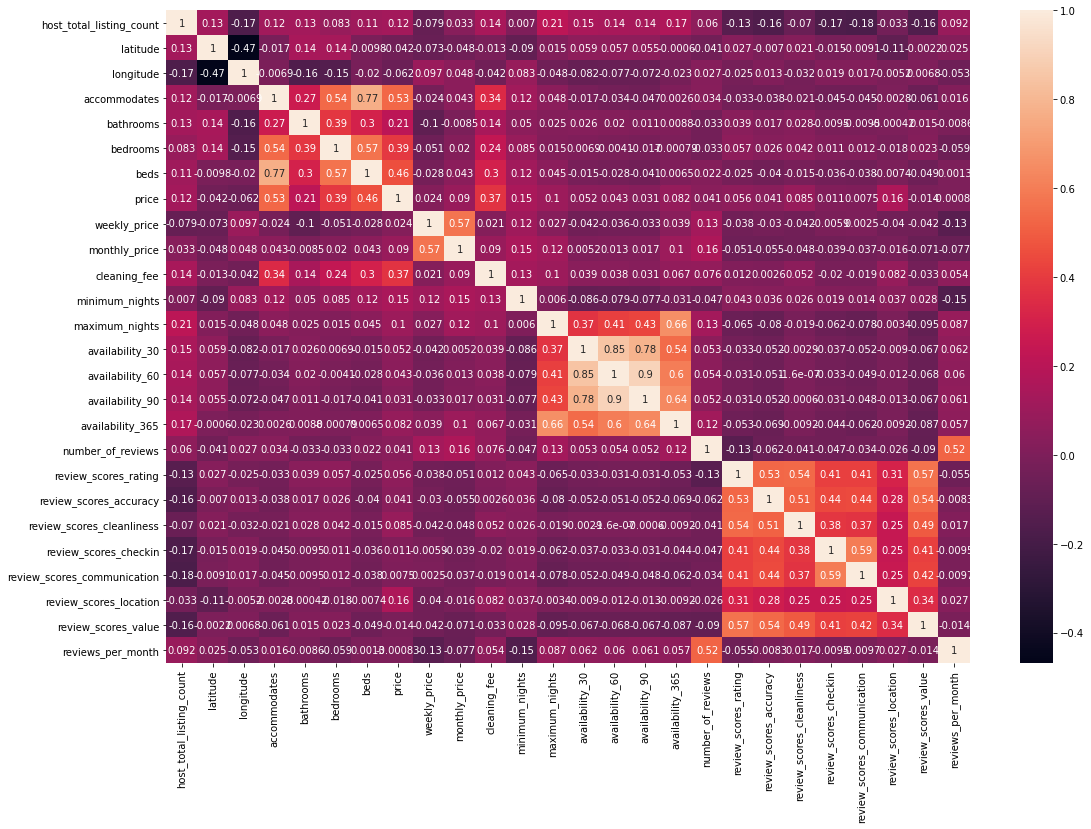

In [ ]:
#on regarde les correlations de df
corr = df.corr(method='kendall')
plt.figure(figsize=(18,12))
sns.heatmap(corr, annot=True)

In [ ]:
#On regarde plus en details les variables scores
#On crée donc un nouveau df avec uniquement les varibales score
df_review=df[["number_of_reviews","review_scores_rating","review_scores_accuracy","review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value","reviews_per_month" ]]

Significations des variables scores:

"review_scores_rating": Expérience globale. Comment le séjour s'est-il passé ?

"review_scores_accuracy": La description de l'annonce est-elle conforme au logement, avec des photos et des informations à jour ?

"review_scores_cleanliness": propreté du logement. Le logement répondait-il aux critères fixés par Airbnb ?

"review_scores_checkin": L'arrivée s'est-elle bien déroulée ?

"review_scores_communication": L'hôte a-t-il répondu rapidement aux messages ?

"review_scores_location": Emplacement du logement Le voyageur a-t-il été informé de la sécurité dans le quartier, de l'accès aux moyens de transport,des points d'intérêt et de considérations particulières telles que le bruit ou d'autres situations susceptibles d'affecter son séjour ?

"Review Scores Value": rapport qualité-prix. Le prix était-il en adéquation avec le logement ?

In [ ]:
df_review.head(15)

number_of_reviews  ...  reviews_per_month
7735531                19.0  ...               0.98
3036231                17.0  ...               0.51
2183529                29.0  ...               0.84
515970                 64.0  ...               1.13
3144316               135.0  ...               3.92
10740199                7.0  ...               2.16
10076940               10.0  ...               0.65
8500219                38.0  ...               2.09
13086480                2.0  ...               0.24
7660518                11.0  ...               0.54
12155399                5.0  ...               0.59
16775843                1.0  ...               0.40
12140244                3.0  ...               0.28
3976617               243.0  ...               7.75
14583095                4.0  ...               0.56

[15 rows x 9 columns]

In [ ]:
df_review.describe()

number_of_reviews  ...  reviews_per_month
count       68872.000000  ...       68872.000000
mean           19.456601  ...           1.258645
std            31.720886  ...           1.425530
min             1.000000  ...           0.010000
25%             3.000000  ...           0.300000
50%             8.000000  ...           0.730000
75%            22.000000  ...           1.690000
max           488.000000  ...          18.000000

[8 rows x 9 columns]

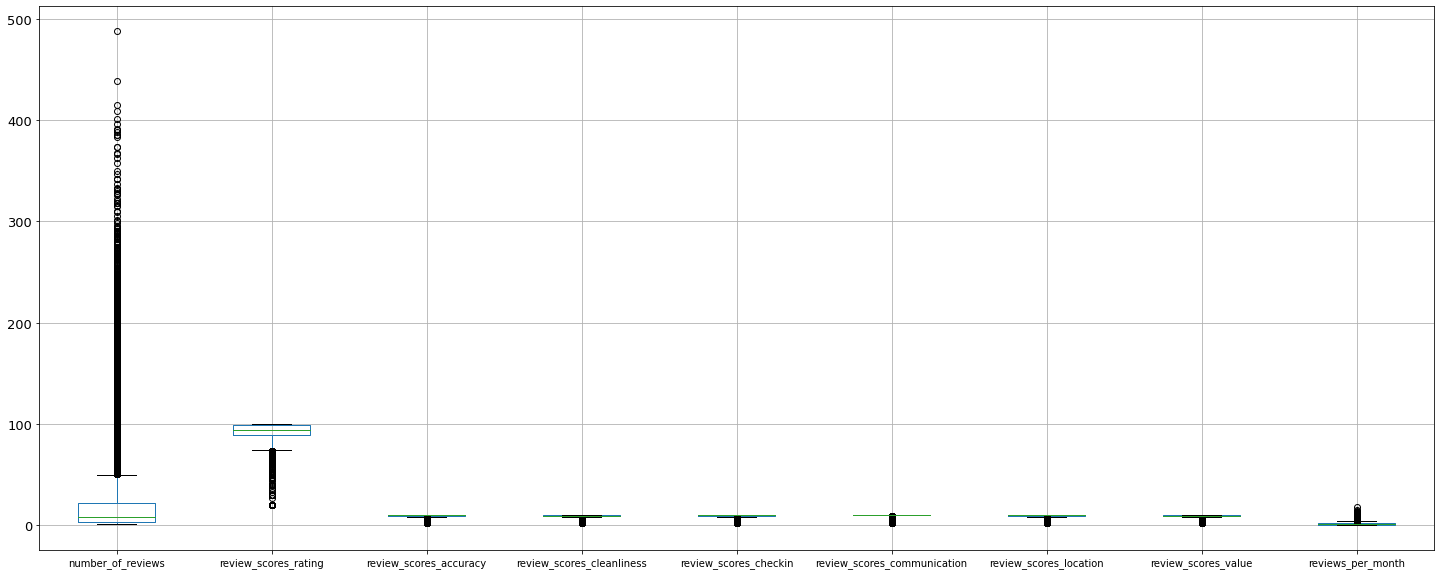

In [ ]:
df_review.boxplot(figsize= (25,10));  # On distinque un nombre d'outliers dans number_of_reviews qui sont les biens avec énormement de reviews par rapports à la moyenne. 
#Ainsi que des outliers dans review_score_rating avec des notes en dessous de la moyenne de la majorité des autres

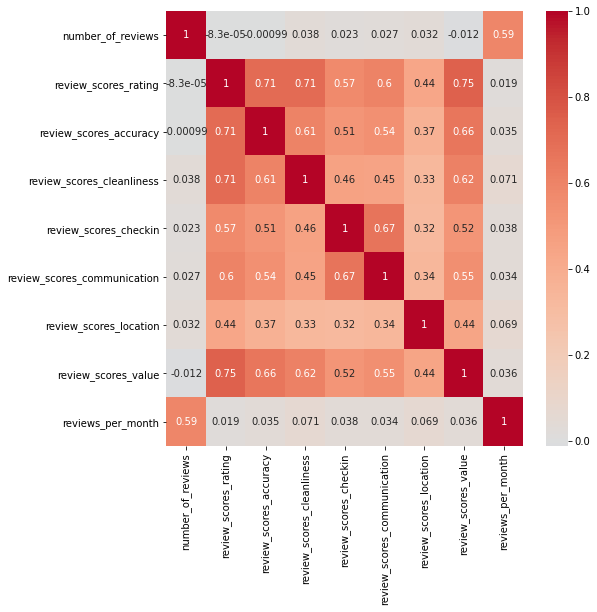

In [ ]:
cor=df_review.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(cor,annot=True,center=0,cmap="coolwarm");

On remarque que la variable la plus corrélée avec la variable cible "review_scores_rating"est la variable "review_score_value". Le rapport qualité-prix est donc l'élément qui influe le plus la note globale donnée par les utilisateurs. Le nombre de notes d'un logement n'influence quasiment pas la note globale.

Le deuxièm critère qui fait varier la note globale est la véracité, l'exactitute de l'annonce par rapport à la réalité ("review_scores_accuracy") Vient ensuite le critère de propreté.

La note concernant la localisation du logement influence peu la note globale.

Les notes laissées au sujet de la bonne communication de l'hôte avec son client et celle concernant le check-in sont étroitement liées.

Contrairement à ce que l'on pourrait penser, le nombre de notes n'influence pas la note globale.

In [ ]:
# Nous allons maintenant regarder si les relations entre les variables scores sont différentes en prenant seulement une ville. 

df_paris_review=df_paris[["number_of_reviews","review_scores_rating","review_scores_accuracy","review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value","reviews_per_month" ]]
df_london_review=df_london[["number_of_reviews","review_scores_rating","review_scores_accuracy","review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value","reviews_per_month" ]]


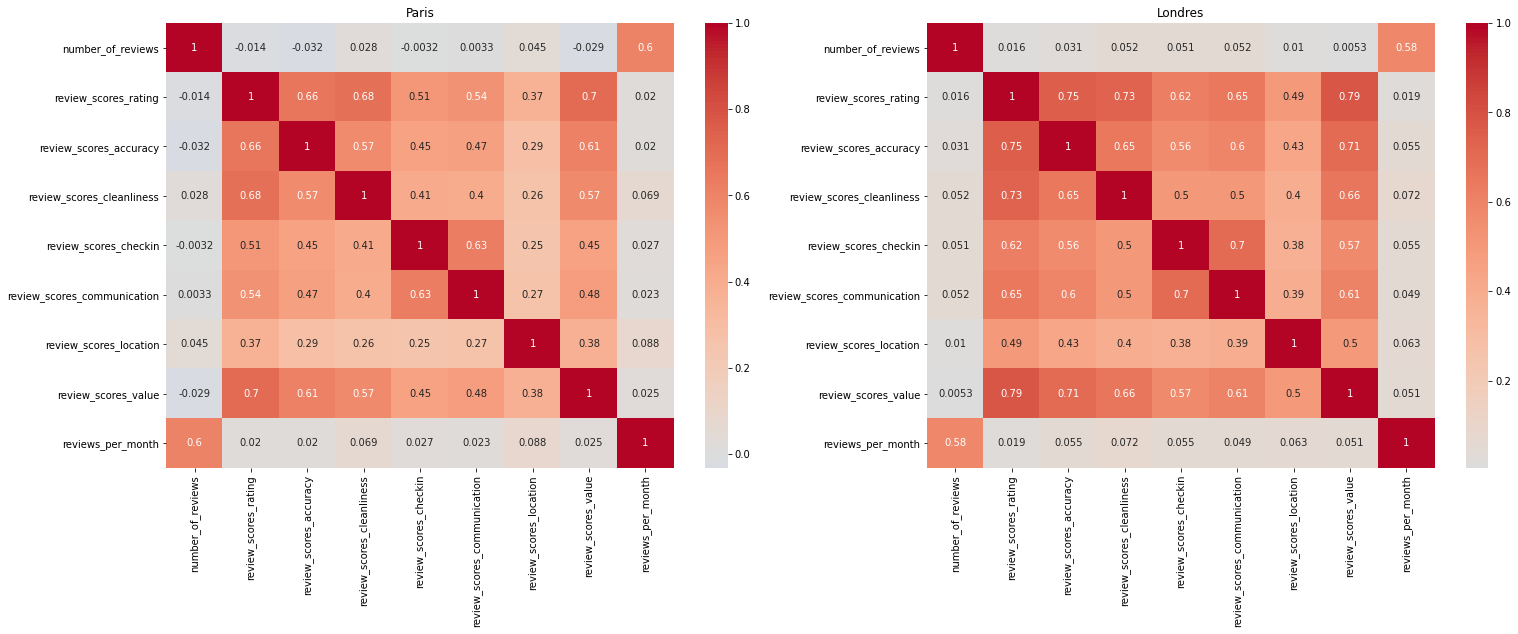

In [ ]:
#On compare maintenant la correlation des variable reviews pour chacune des deux villes: Paris et Londres
cor_paris=df_paris_review.corr()
cor_london=df_london_review.corr()
fig = plt.figure(figsize=(25,18))

plt.subplot(221)
sns.heatmap(cor_paris,annot=True,center=0,cmap="coolwarm").set_title('Paris');

plt.subplot(222)
sns.heatmap(cor_london,annot=True,center=0,cmap="coolwarm").set_title('Londres');

Les corrélations entre les variables dans une ville comme Paris ou Londre ne changent quasiment pas par rapport au dataset complet incluant Paris et Londres.

Text(0.5, 1.0, 'Londres')

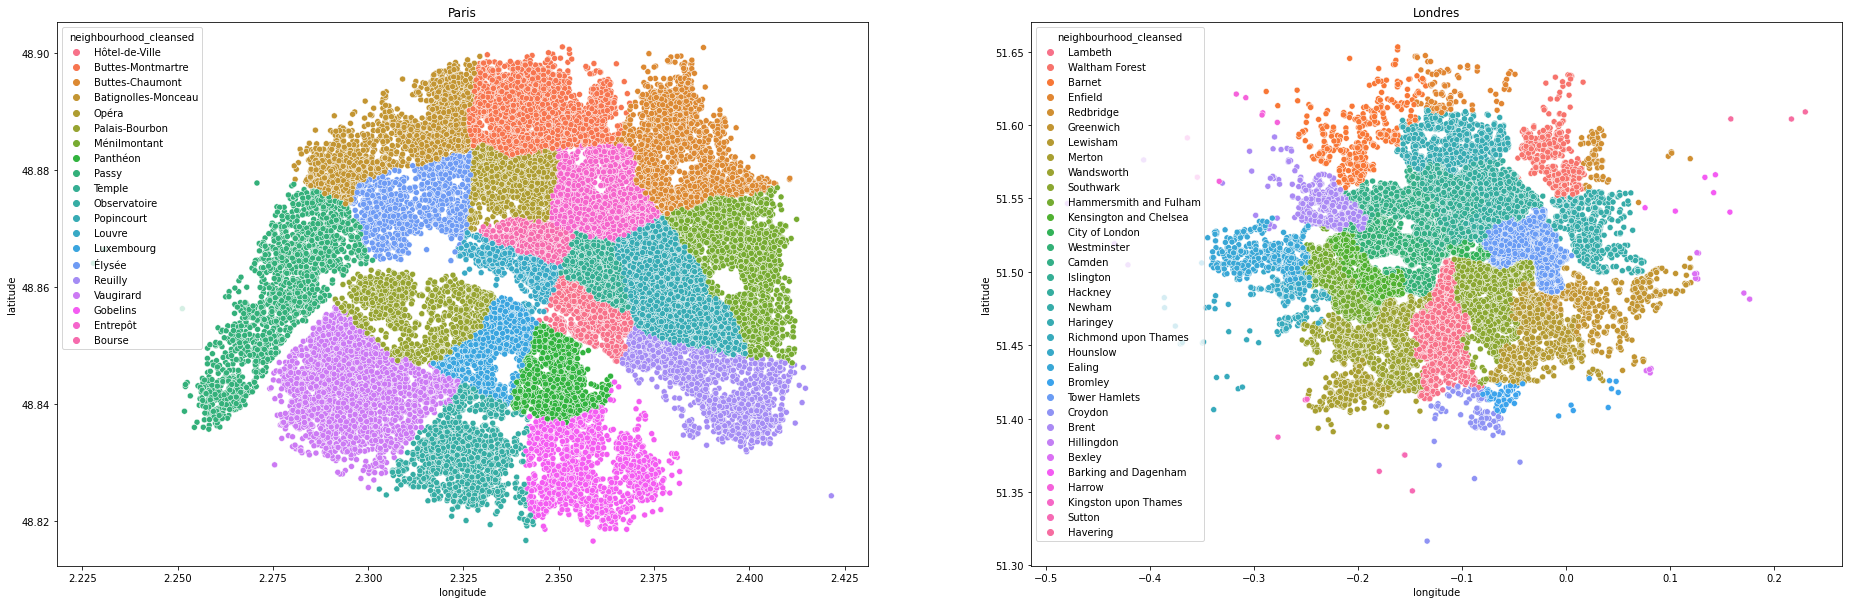

In [ ]:
#visualisation de biens par Quartiers
fig = plt.figure(figsize=(32,22))

plt.subplot(221)
sns.scatterplot(df_paris.longitude,df_paris.latitude,hue=df_paris.neighbourhood_cleansed).set_title('Paris')

plt.subplot(222)
sns.scatterplot(df_london.longitude,df_london.latitude,hue=df_london.neighbourhood_cleansed).set_title('Londres')

plt.show()

On observe 20 quartiers bien distinct pour Paris.

On observe pour Londres 33 quartiers dans la légende, cependant beaucoup difficile à distinguer sur la carte car très éparpillés.

Nous allons donc regarder un peu plus en détails

Text(0.5, 1.0, 'Londres')

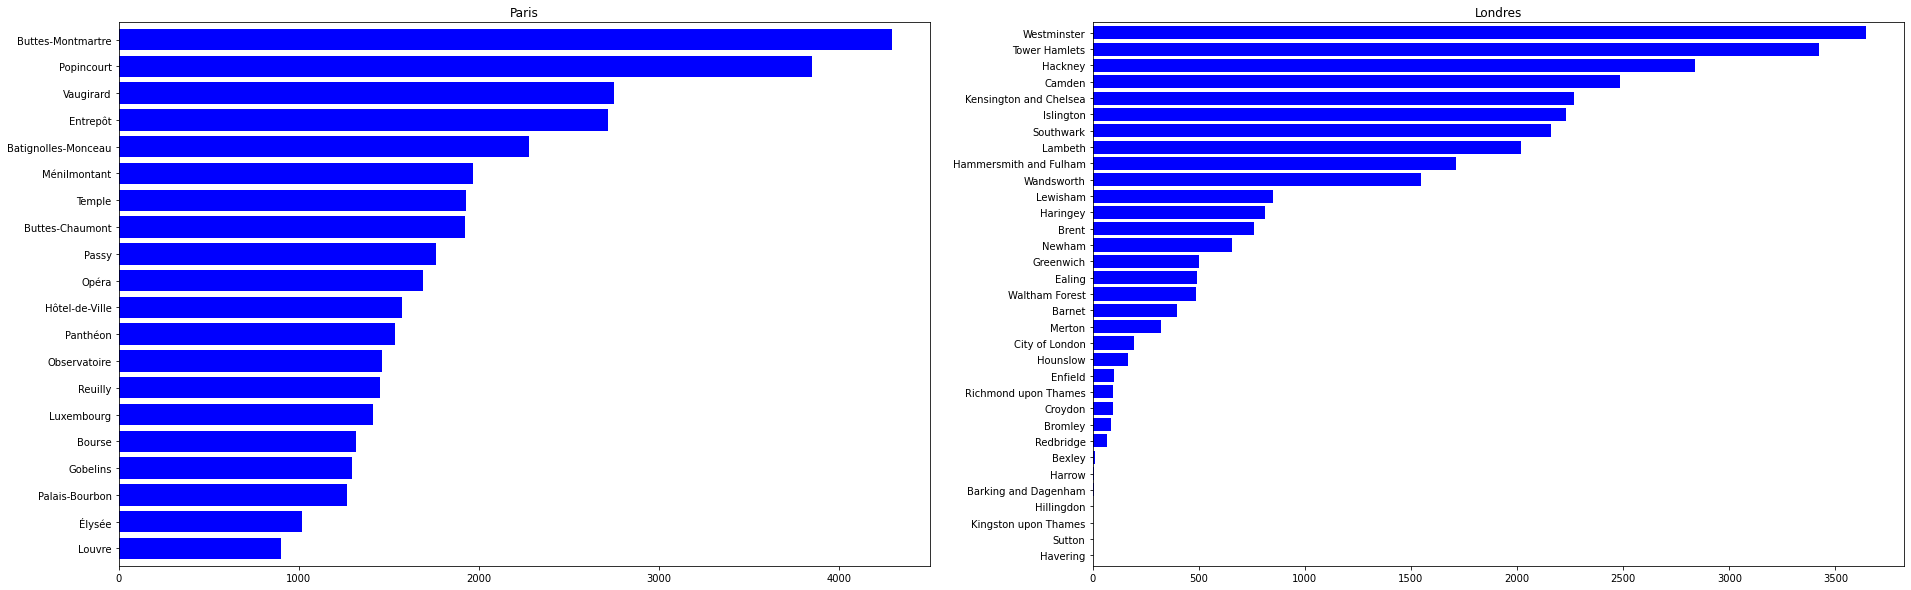

In [ ]:
#Nombre de biens par quartier
quart_paris=df_paris['neighbourhood_cleansed'].value_counts().sort_values(ascending=True)
quart_london=df_london['neighbourhood_cleansed'].value_counts().sort_values(ascending=True)
fig = plt.figure(figsize=(32,22))

plt.subplot(221)
quart_paris.plot(kind = 'barh', color='b', width=0.8).set_title('Paris')

plt.subplot(222)
quart_london.plot(kind = 'barh', color='b', width=0.8).set_title('Londres')

plt.show()

Pour Paris rien ne change, 20 quartiers bien distinct.

Pour Londres, on constate 26 quartiers qui ont un nombres de biens visible, les autres quartiers ont trop peu de biens pour être visible

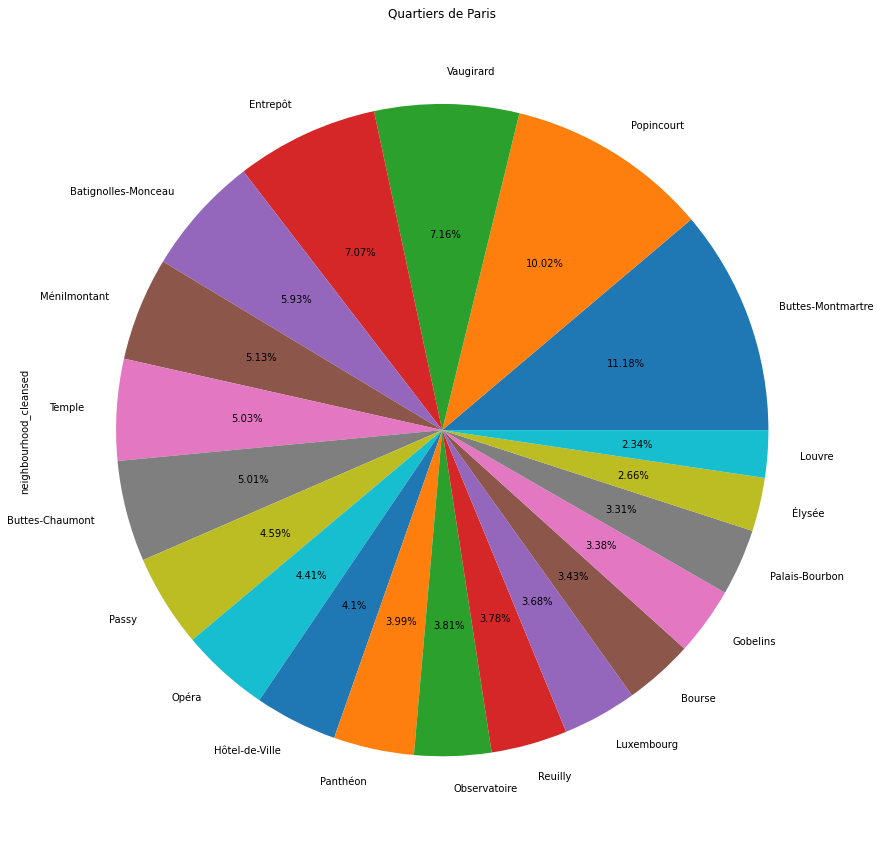

In [ ]:
#On définit un pie plot pour afficher le pourcentages de bien par quartiers de Paris
def pie_neigh_paris(neighbourhood_cleansed):
  df_paris['neighbourhood_cleansed'].value_counts().plot.pie(figsize = (15, 15),autopct= lambda x: str(round(x, 2)) + '%').set_title('Quartiers de Paris')
#Affichage du pie plot de Paris
pie_neigh_paris('neighbourhood_cleansed')

On observe que 2 quartiers sortent du lot "Buttes-Montmartre" et "Popincourt" qui à eux 2 detiennent 21,20% des biens Airbnb proposé à Paris

Suivis de 2 autres quartiers qui sortent aussi du lot "Vaugirard" et "Entrepot" avec 14,23%

Donc 4 sur 20 quartiers détiennent 35,43% des biens airbnb à Paris

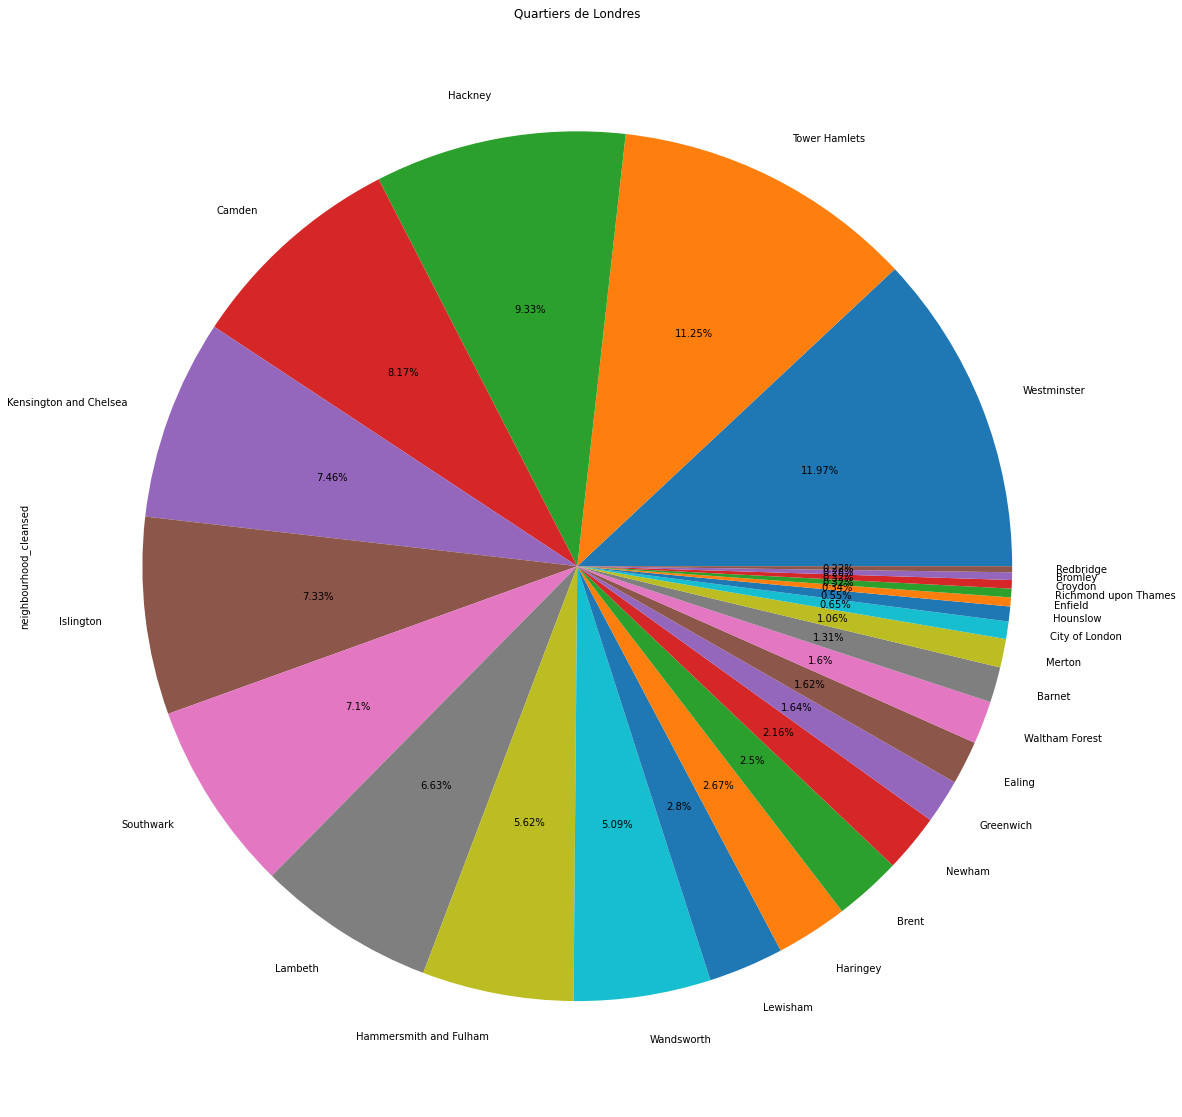

In [ ]:
#On définit un pie plot pour afficher le pourcentages de bien par quartiers de Londre
def pie_neigh_london(neighbourhood_cleansed):
  df_london['neighbourhood_cleansed'].value_counts().head(26).plot.pie(figsize = (20, 20),autopct= lambda x: str(round(x, 2)) + '%').set_title('Quartiers de Londres')

#Affichage du pie plot de Londres.  (Un peu plus grand que le précédant pourune meilleur visibilité car il y a un plus grand nombre de quartier)
pie_neigh_london('neighbourhood_cleansed')

On observe que 10 sur 26 quartiers de Londres détiennent 80% des biens Airbnb proposés

Text(0.5, 1.0, 'Londres')

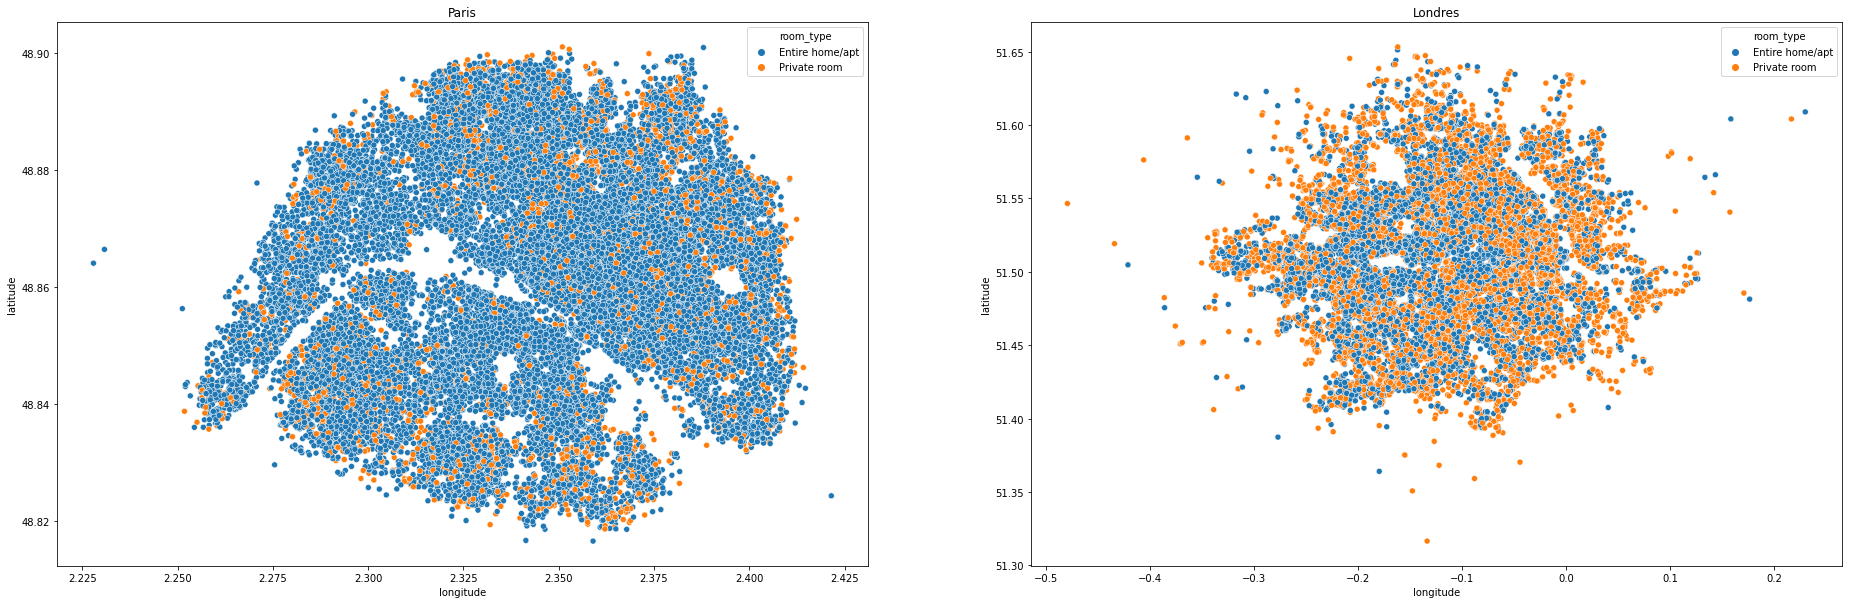

In [ ]:
#visualisation par Type de chambres
fig = plt.figure(figsize=(32,22))

plt.subplot(221)
sns.scatterplot(df_paris.longitude,df_paris.latitude,hue=df_paris.room_type).set_title('Paris')

plt.subplot(222)
sns.scatterplot(df_london.longitude,df_london.latitude,hue=df_london.room_type).set_title('Londres')

plt.show()

On aperçoit une net différence entre les 2 villes. Paris propose principalement des logement entier alors que Londres propose énormément de chambres dans des logements habités.

Text(0.5, 1.0, 'Londres')

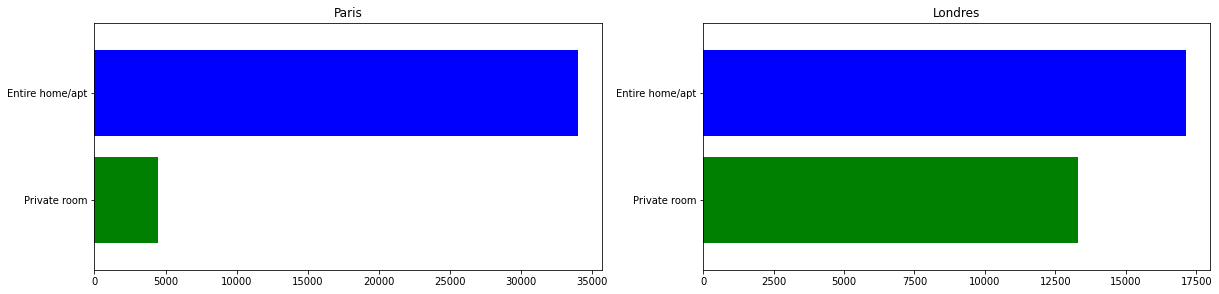

In [ ]:
# Type de chambre par ville
freq_paris = df_paris['room_type']. value_counts().sort_values(ascending=True)
freq_london = df_london['room_type']. value_counts().sort_values(ascending=True)

fig = plt.figure(figsize=(20,10))

plt.subplot(221)
freq_paris.plot(kind = 'barh', color = ["g","b","r"], width=0.8).set_title('Paris')

plt.subplot(222)
freq_london.plot(kind = 'barh', color = ["g","b","r"], width=0.8).set_title('Londres')

plt.show()

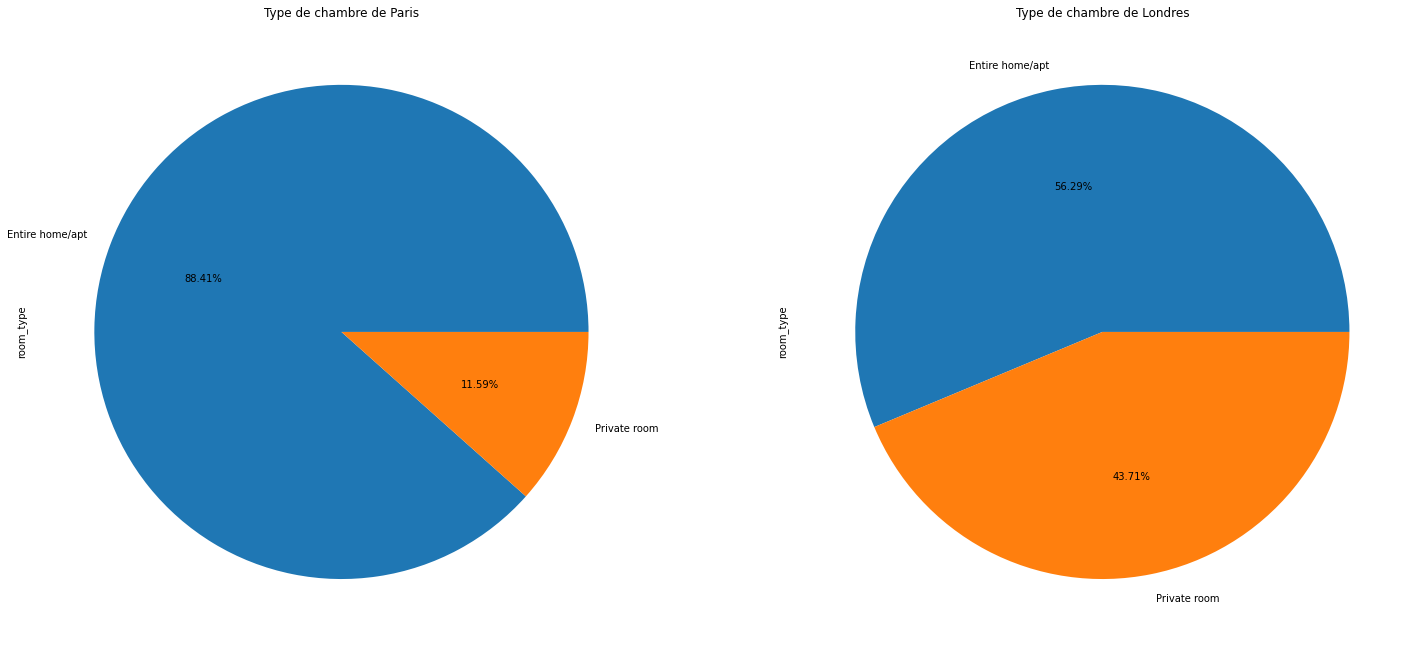

In [ ]:
#Type de chambre par ville en pourcentage
fig = plt.figure(figsize=(25,25))

plt.subplot(221)
df_paris['room_type'].value_counts().plot.pie(autopct= lambda x: str(round(x, 2)) + '%').set_title('Type de chambre de Paris')

plt.subplot(222)
df_london['room_type'].value_counts().plot.pie(autopct= lambda x: str(round(x, 2)) + '%').set_title('Type de chambre de Londres')

plt.show()

Il y a un net différence entre Paris et Londres sur le type de chambre proposé

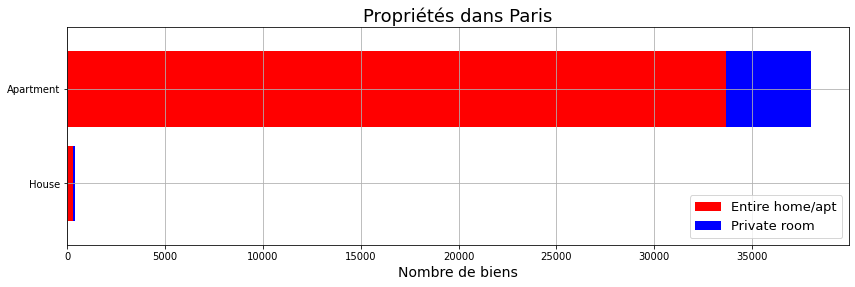

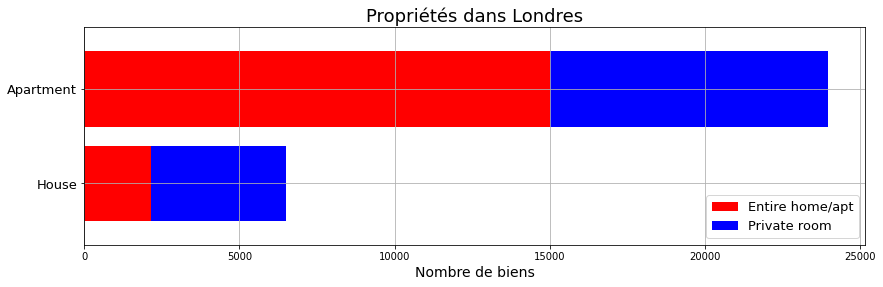

In [ ]:
#Propiétées et types de biens par ville
prop_paris = df_paris.groupby(['property_type','room_type']).room_type.count()
prop_paris = prop_paris.unstack()
prop_paris['total'] = prop_paris.iloc[:,0:3].sum(axis = 1)
prop_paris = prop_paris.sort_values(by=['total'])
prop_paris = prop_paris[prop_paris['total']>=100]
prop_paris = prop_paris.drop(columns=['total'])

prop_london = df_london.groupby(['property_type','room_type']).room_type.count()
prop_london = prop_london.unstack()
prop_london['total'] = prop_london.iloc[:,0:3].sum(axis = 1)
prop_london = prop_london.sort_values(by=['total'])
prop_london = prop_london[prop_london['total']>=100]
prop_london = prop_london.drop(columns=['total'])

prop_paris.plot(kind='barh',stacked=True, color = ["r","b","g"],
              linewidth = 1, grid=True, figsize=(14,4), width=0.8)
plt.title('Propriétés dans Paris', fontsize=18)
plt.xlabel('Nombre de biens', fontsize=14)
plt.ylabel("")
plt.legend(loc = 4,prop = {"size" : 13})
plt.rc('ytick', labelsize=13)
plt.show()

prop_london.plot(kind='barh',stacked=True, color = ["r","b","g"],
              linewidth = 1, grid=True, figsize=(14,4), width=0.8)
plt.title('Propriétés dans Londres', fontsize=18)
plt.xlabel('Nombre de biens', fontsize=14)
plt.ylabel("")
plt.legend(loc = 4,prop = {"size" : 13})
plt.rc('ytick', labelsize=13)
plt.show()

Text(0.5, 1.0, 'Londres')

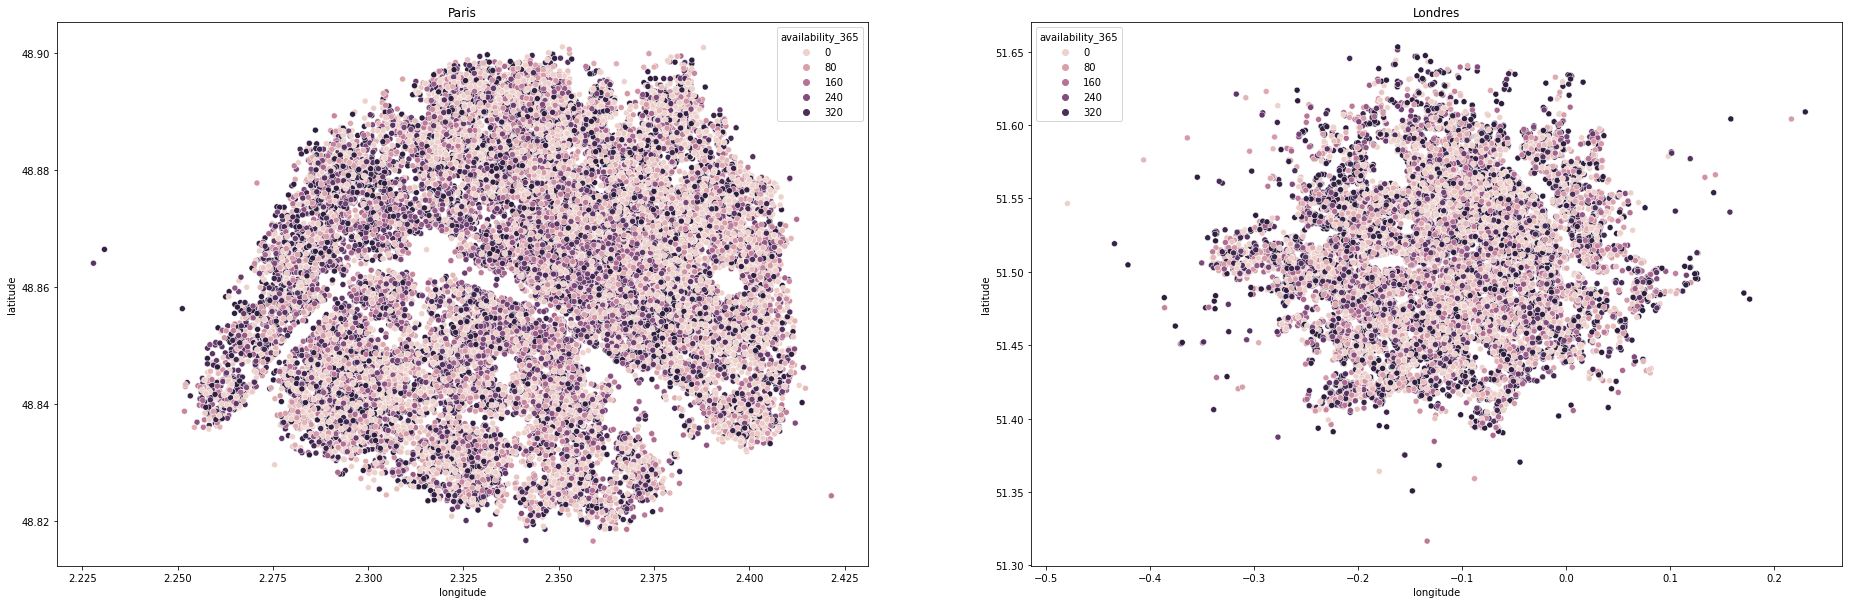

In [ ]:
#visualisation par disponibilité
fig = plt.figure(figsize=(32,22))

plt.subplot(221)
sns.scatterplot(df_paris.longitude,df_paris.latitude,hue=df_paris.availability_365).set_title('Paris')

plt.subplot(222)
sns.scatterplot(df_london.longitude,df_london.latitude,hue=df_london.availability_365).set_title('Londres')

plt.show()

In [ ]:
#!pip install --upgrade geopandas  #à exécuter

In [ ]:
#On importe les bibliotheques pour une carte intéractive
import folium
from folium.plugins import FastMarkerCluster
import geopandas as gpd
from branca.colormap import LinearColormap

#On initialise la carte interactive de Paris  
lat_paris = df_paris['latitude'].tolist()
lon_paris = df_paris['longitude'].tolist()
locations_paris = list(zip(lat_paris, lon_paris))

map1 = folium.Map(location=[48.862725, 2.287592], zoom_start=12.4)
FastMarkerCluster(data=locations_paris).add_to(map1)
map1

In [ ]:
#On initialise la carte interactive de Londre  
lat_london = df_london['latitude'].tolist()
lon_london = df_london['longitude'].tolist()
locations_london = list(zip(lat_london, lon_london))

map2 = folium.Map(location=[51.509865, -0.118092], zoom_start=10.5)
FastMarkerCluster(data=locations_london).add_to(map2)
map2